In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime as dt
from scipy import stats
import glob as g
import matplotlib.pyplot as plt

In [33]:
def importer(dossier):
    
    liste_ext = {'xlsx':'excel','csv':'csv'}
    globals()['list_df'] = []
    
    fichiers = [file for file in g.glob(dossier+'/*')]
    
    for fichier in fichiers:

        fichier = fichier.split('\\')
        (fnom,fext) = fichier[len(fichier)-1].split('.')
        fichier = str(dossier)+'/'+str(fichier[1])
        
        if fext in liste_ext.keys():
            exec("globals()[fnom] = pd.read_"+liste_ext[fext]+"(fichier)")
            print(fichier + ": Importé dans '"+fnom+"'")
            list_df.append(fnom)
        else:
            print('extension non reconnu, liste compatible: ')
            print(liste_ext)
#findef

importer('./Data_P6')

./Data_P6/customers.csv: Importé dans 'customers'
./Data_P6/products.csv: Importé dans 'products'
./Data_P6/transactions.csv: Importé dans 'transactions'


In [34]:
def age(année):
    return dt.now().year - année

customers.insert(3,"age",age(customers['birth']))
customers.drop(columns='birth', inplace=True)

# Faire des liaisons et enlever les données incohérentes

In [35]:
profils = customers.merge(transactions, how='outer', on='client_id')

err_produit = profils.merge(products, how='outer', on='id_prod',indicator=True)
err_produit = err_produit[err_produit['_merge'] != 'both']
profils = profils.merge(products, how='inner', on='id_prod')

err_prix = profils[profils['price']<0]
profils = profils[profils['price']>=0]

err_null = profils[profils.isna().sum(axis=1) > 0]

#display(err_null)
#Pas de valuer null dans le tableau
#Les Id_sessions sont tous unique

profils['date'] = pd.to_datetime(profils['date']) #Conversion en type date pour analyse futur

In [36]:
display(err_produit)

,client_id,sex,age,id_prod,date,session_id,price,categ,_merge
542051,c_4505,m,46.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN,left_only
542052,c_4505,m,46.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN,left_only
542053,c_3468,f,41.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN,left_only
542054,c_3468,f,41.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN,left_only
542055,c_1403,f,44.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
679569,NaN,NaN,NaN,0_1624,NaN,NaN,24.50,0.0,right_only
679570,NaN,NaN,NaN,2_86,NaN,NaN,132.36,2.0,right_only
679571,NaN,NaN,NaN,0_299,NaN,NaN,22.99,0.0,right_only
679572,NaN,NaN,NaN,0_510,NaN,NaN,23.66,0.0,right_only


In [37]:
display(err_prix)
# Le produit 'T_0' a un prix négatif (-1)
# C'est un produit de test effectué le 01-03-2021 à 2h30:02

,client_id,sex,age,id_prod,date,session_id,price,categ
677888,ct_0,f,21,T_0,test_2021-03-01 02:30:02.237419,s_0,-1.0,0
677889,ct_0,f,21,T_0,test_2021-03-01 02:30:02.237425,s_0,-1.0,0
677890,ct_0,f,21,T_0,test_2021-03-01 02:30:02.237436,s_0,-1.0,0
677891,ct_0,f,21,T_0,test_2021-03-01 02:30:02.237430,s_0,-1.0,0
677892,ct_0,f,21,T_0,test_2021-03-01 02:30:02.237449,s_0,-1.0,0
...,...,...,...,...,...,...,...,...
678083,ct_1,m,21,T_0,test_2021-03-01 02:30:02.237420,s_0,-1.0,0
678084,ct_1,m,21,T_0,test_2021-03-01 02:30:02.237427,s_0,-1.0,0
678085,ct_1,m,21,T_0,test_2021-03-01 02:30:02.237449,s_0,-1.0,0
678086,ct_1,m,21,T_0,test_2021-03-01 02:30:02.237424,s_0,-1.0,0


# Tableau des profils

In [38]:
profils = profils.sort_values(by='date',ascending=True)
display(profils)

,client_id,sex,age,id_prod,date,session_id,price,categ
129502,c_329,f,55,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0
17306,c_664,m,62,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0
146527,c_580,m,34,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0
506717,c_7912,f,33,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0
218220,c_2033,f,66,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0
...,...,...,...,...,...,...,...,...
614783,c_3573,f,26,1_508,2023-02-28 23:49:03.148402,s_348444,21.92,1
125522,c_50,f,28,2_37,2023-02-28 23:51:29.318531,s_348445,48.99,2
425822,c_488,f,37,1_695,2023-02-28 23:53:18.929676,s_348446,26.99,1
374054,c_4848,m,69,0_1547,2023-02-28 23:58:00.107815,s_348447,8.99,0


# Chiffre d'affaire par produit

In [39]:
# Compter le nombre de fois qu'un produit apparait dans le fichier transaction et calculer le CA

nb_vente = transactions.groupby(['id_prod']).count().loc[:,['client_id']]
nb_vente = nb_vente.rename(columns={'client_id':'nb_vente'})

ventes = nb_vente.merge(products,how='outer', on='id_prod', indicator=True)
ventes = ventes[ventes['_merge'] == 'both']

ventes.insert(2,"CA", ventes['price']*ventes['nb_vente'])
ventes.drop(columns=['_merge'],inplace=True)
ventes = ventes[ventes['id_prod'] != 'T_0']

display(len(transactions['id_prod'].unique()))

3267

# Le top 20 des ventes

In [40]:
display(ventes.sort_values(by='nb_vente',ascending=False).head(20))

,id_prod,nb_vente,CA,price,categ
2592,1_369,2252.0,54025.48,23.99,1.0
2645,1_417,2189.0,45947.11,20.99,1.0
2642,1_414,2180.0,51949.40,23.83,1.0
2734,1_498,2128.0,49731.36,23.37,1.0
2654,1_425,2096.0,35611.04,16.99,1.0
2630,1_403,1960.0,35260.40,17.99,1.0
2640,1_412,1951.0,32484.15,16.65,1.0
2641,1_413,1945.0,34990.55,17.99,1.0
2633,1_406,1939.0,48106.59,24.81,1.0
2634,1_407,1935.0,30940.65,15.99,1.0


# Le flop 20 des ventes

In [41]:
display(ventes.sort_values(by='nb_vente',ascending=True).head(20))

,id_prod,nb_vente,CA,price,categ
1327,0_2201,1.0,20.99,20.99,0.0
665,0_1601,1.0,1.99,1.99,0.0
1793,0_549,1.0,2.99,2.99,0.0
3248,2_81,1.0,86.99,86.99,2.0
2080,0_807,1.0,1.99,1.99,0.0
752,0_1683,1.0,2.99,2.99,0.0
166,0_1151,1.0,2.99,2.99,0.0
698,0_1633,1.0,24.99,24.99,0.0
2109,0_833,1.0,2.99,2.99,0.0
2167,0_886,1.0,21.82,21.82,0.0


# Les 0 ventes

In [42]:
display(err_produit[err_produit['client_id'].isnull()])

,client_id,sex,age,id_prod,date,session_id,price,categ,_merge
679553,NaN,NaN,NaN,0_1016,NaN,NaN,35.06,0.0,right_only
679554,NaN,NaN,NaN,0_1780,NaN,NaN,1.67,0.0,right_only
679555,NaN,NaN,NaN,0_1062,NaN,NaN,20.08,0.0,right_only
679556,NaN,NaN,NaN,0_1119,NaN,NaN,2.99,0.0,right_only
679557,NaN,NaN,NaN,0_1014,NaN,NaN,1.15,0.0,right_only
679558,NaN,NaN,NaN,1_0,NaN,NaN,31.82,1.0,right_only
679559,NaN,NaN,NaN,0_1318,NaN,NaN,20.92,0.0,right_only
679560,NaN,NaN,NaN,0_1800,NaN,NaN,22.05,0.0,right_only
679561,NaN,NaN,NaN,0_1645,NaN,NaN,2.99,0.0,right_only
679562,NaN,NaN,NaN,0_322,NaN,NaN,2.99,0.0,right_only


# Chiffre d'affaire dans le temps

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

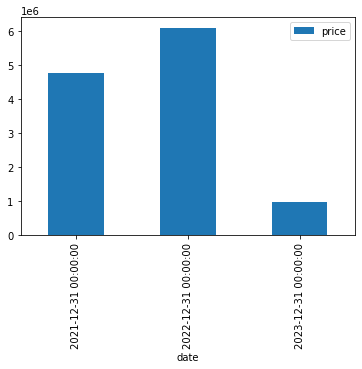

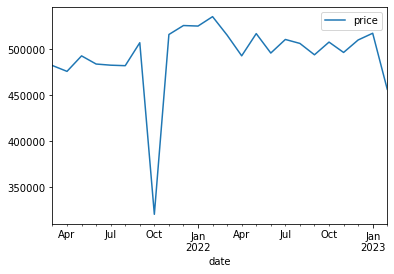

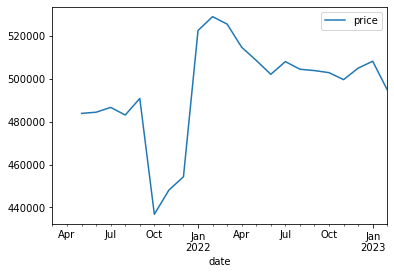

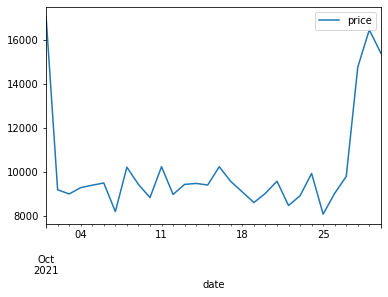

In [43]:
display(profils.resample("Y", on='date').sum().loc[:,['price']].plot.bar()) # vue sur l'année
display(profils.resample("M", on='date').sum().loc[:,['price']].plot()) # vue sur le mois
display(profils.resample("M", on='date').sum().loc[:,['price']].rolling(3).mean().plot())
display(profils[profils['date'].between('2021-10-01','2021-10-31')].loc[:,['price','date']].resample("1d", on='date').sum().plot())

# Répartition du chiffre d'affaire par client

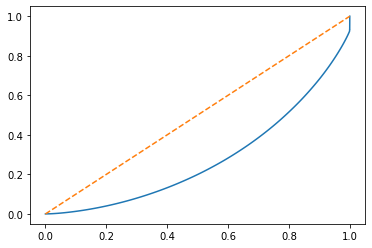

<AxesSubplot:xlabel='client_id'>

<AxesSubplot:xlabel='client_id'>

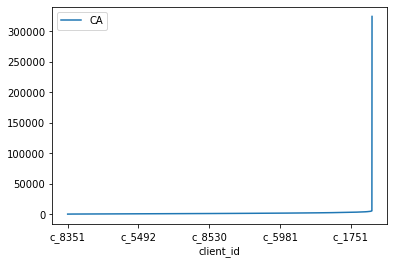

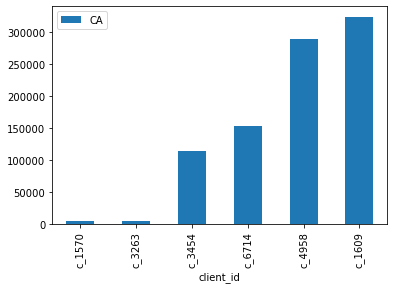

In [44]:
# établir la répartition du chiffre d'affaire entre les clients.
def courbe_lorenz(data):
    data_size = len(data)
    lorenz = ''
    lorenz = np.cumsum(data) / data.sum()
    lorenz = np.append([0],lorenz) 

    xaxis = np.linspace(0-1/data_size,1+1/data_size,data_size+1)
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    
    x=[0,1]
    y=[0,1]
    plt.plot(x,y,'--')
    plt.show()

def price_to_CA(data):
    data_CA = data.groupby(by=['client_id']).sum()
    data_CA.rename(columns={'price':'CA'},inplace=True)
    data_CA = data_CA.loc[:,['CA']].sort_values(by='CA', ascending=True)
    return data_CA

profils_CA = price_to_CA(profils)
courbe_lorenz(profils_CA)

display(profils_CA.plot())
display(profils_CA.tail(6).plot.bar())

# Courbe d'achat des 4 plus gros clients sur le mois d'octobre

<AxesSubplot:xlabel='date'>

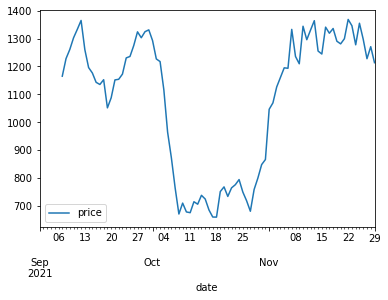

In [45]:
gros_clients = profils[profils['client_id'].isin({'c_3454','c_6714','c_1609','c_4958'})]
display(gros_clients[gros_clients['date'].between('2021-09-01','2021-11-30')].loc[:,['price','date']].resample("1d", on='date').sum().rolling(7).mean().plot())

# Etablir des profils d'achat

In [46]:
# Profil par sex
femmes = profils[profils['sex'] == 'f']
hommes = profils[profils['sex'] == 'm']

# Profil par tranche d'âge
jeunes = profils[profils['age'].between(18,30)]
actifs = profils[profils['age'].between(26,60)]
vieux = profils[profils['age'] >= 61]

# Liens entre les catégories et le genre

### achat des hommes

<AxesSubplot:xlabel='categ'>

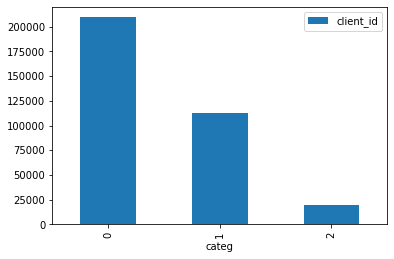

In [47]:
achat_h = hommes.groupby(by=['categ']).count().loc[:,['client_id']]
achat_h.plot.bar()

### achat des femmes

<AxesSubplot:xlabel='categ'>

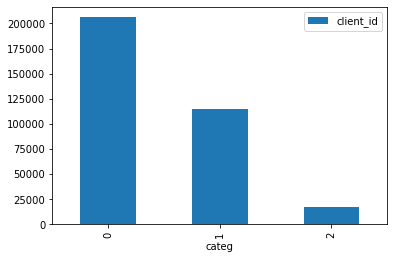

In [48]:
achat_f = femmes.groupby(by=['categ']).count().loc[:,['client_id']]
achat_f.plot.bar()

### différence d'achat entre les genres

<AxesSubplot:xlabel='categ'>

,client_id
categ,
0,0.782989
1,1.157288
2,5.254502


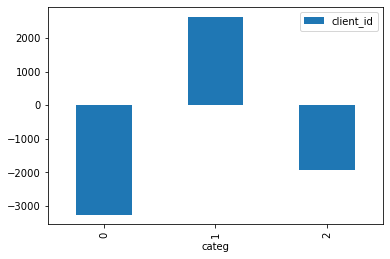

In [49]:
comparaison = achat_f - achat_h
display(comparaison.plot.bar())
display(abs((comparaison/(achat_h+achat_f))*100))

# CA par âge

In [50]:
def répartition_CA(data):
    Gros_CA = data[data['CA'] > 50000]
    data = data[data['CA'] < 50000] # J'enlève les grosses baleine qui sont des cas à part

    display(Gros_CA)
    display(data.boxplot(['CA']))    

# Les jeunes

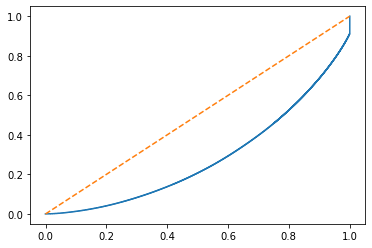

,CA
client_id,
c_4958,289760.34


<AxesSubplot:>

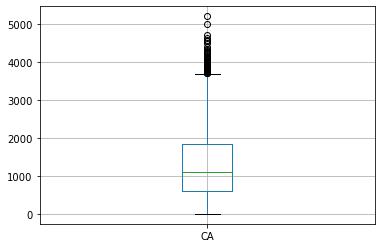

In [51]:
jeunes_CA = price_to_CA(jeunes)
courbe_lorenz(jeunes_CA)
répartition_CA(jeunes_CA)

# Les actifs

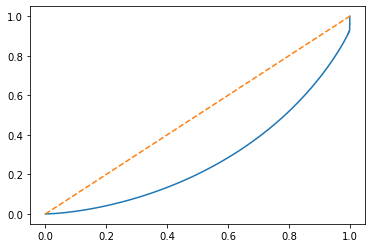

,CA
client_id,
c_3454,113637.93
c_6714,153598.92
c_1609,324033.35


<AxesSubplot:>

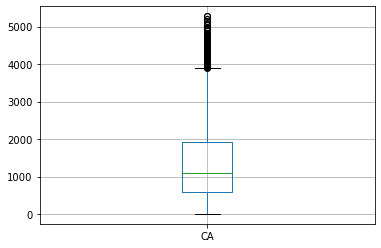

In [52]:
actifs_CA = price_to_CA(actifs)
courbe_lorenz(actifs_CA)
répartition_CA(actifs_CA)

# Les vieux

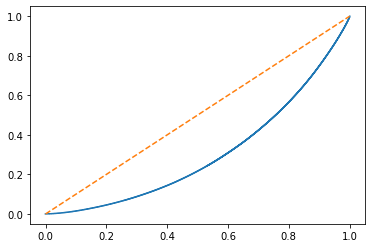

,CA
client_id,


<AxesSubplot:>

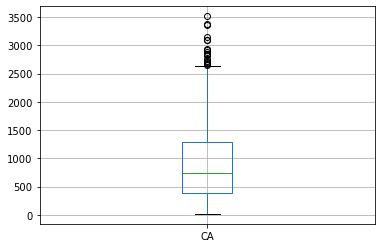

In [53]:
vieux_CA = price_to_CA(vieux)
courbe_lorenz(vieux_CA)
répartition_CA(vieux_CA)

In [54]:
profils['date'] = pd.to_datetime(profils['date']).dt.date
achat_jour = profils.loc[:,['client_id','date','price']].sort_values(by=['client_id','date'], ascending=True).groupby(by=['client_id','date']).sum().sort_values('price',ascending=True).reset_index()

# Paniers moyens par client

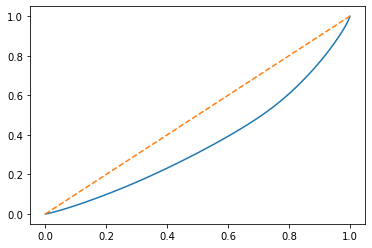

None

<AxesSubplot:xlabel='client_id'>

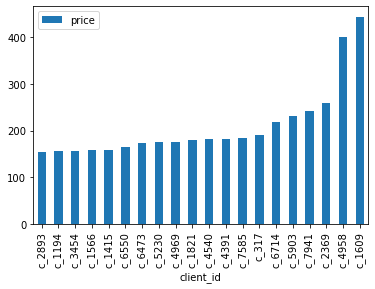

In [55]:
paniers_moyen = achat_jour.groupby(by='client_id').mean().sort_values(by=['price'], ascending=True)

display(courbe_lorenz(paniers_moyen))
display(paniers_moyen.tail(20).plot.bar())

nb_achat = profils.groupby(by=['client_id'])['date'].nunique().sort_values()

In [56]:
# Profil par tranche d'âge
corrélation = profils.loc[:, ['client_id','age','sex']]
corrélation = achat_jour.merge(corrélation, on='client_id', how='inner')
corrélation = corrélation.drop_duplicates()

#Changement des lettres en chiffre pour que la corrélation soit calculé
corrélation['sex'] = corrélation['sex'].replace({'f':1})
corrélation['sex'] = corrélation['sex'].replace({'m':0})

#On enlève les gros clients
corrélation = corrélation[-corrélation['client_id'].isin({'c_3454','c_6714','c_1609','c_4958'})]

#On calcule le panier moyen
corrélation = corrélation.groupby(by=['client_id']).mean()

jeunes = profils[profils['age'].between(18,30)]
actifs = profils[profils['age'].between(26,60)]
vieux = profils[profils['age'] >= 61]

corrélation['age_categ'] = corrélation['age'].apply(lambda x: "jeunes" if x <= 30 
                                                    else "actifs" if x <= 60
                                                    else "vieux")

<AxesSubplot:xlabel='age_categ', ylabel='price'>

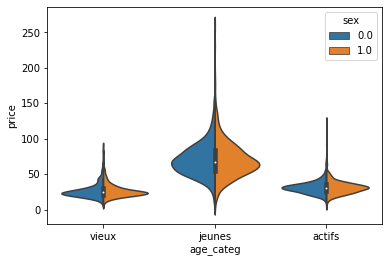

In [57]:
sns.violinplot(data=corrélation, x="age_categ", y="price", hue='sex', split=True)

'p-value = 0.0'

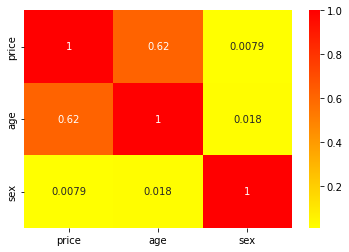

In [58]:
sns.heatmap(corrélation.corr(method='pearson').abs(), annot=True, cmap='autumn_r')
display('p-value = '+str(stats.pearsonr(corrélation['age'],corrélation['price'])[1]))

# Fréquence d'achat

In [59]:
nb_jour_total = profils['date'].nunique()
fréquence = achat_jour.groupby(by='client_id').count() / nb_jour_total
fréquence = fréquence.drop(columns=['price'])
fréquence = fréquence.merge(profils.loc[:,['client_id','sex','age']], on='client_id', how='inner').drop_duplicates()

fréquence = fréquence[-fréquence['client_id'].isin({'c_3454','c_6714','c_1609','c_4958'})]

fréquence['sex'] = fréquence['sex'].replace({'f':1})
fréquence['sex'] = fréquence['sex'].replace({'m':0})

fréquence['age_categ'] = fréquence['age'].apply(lambda x: "jeunes" if x <= 30 
                                                   else "actifs" if x <= 60
                                                   else "vieux")

fréquence.rename(columns={"date":"fréquence/jour"},inplace=True)

,client_id,fréquence/jour,sex,age,age_categ
0,c_1,0.045205,0,67,vieux
39,c_10,0.046575,0,66,vieux
97,c_100,0.006849,0,30,jeunes
105,c_1000,0.117808,1,56,actifs
230,c_1001,0.060274,0,40,actifs
...,...,...,...,...,...
678844,c_995,0.012329,0,67,vieux
678858,c_996,0.104110,1,52,actifs
678953,c_997,0.032877,1,28,jeunes
679012,c_998,0.031507,0,21,jeunes


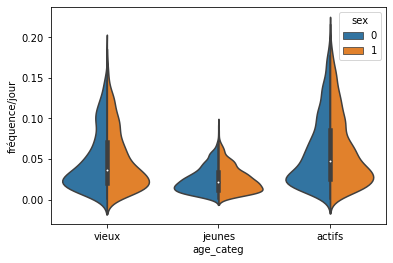

In [60]:
sns.violinplot(data=fréquence, x="age_categ", y="fréquence/jour", hue='sex', split=True)
display(fréquence)

<AxesSubplot:title={'center':'fréquence/jour'}, xlabel='[age_categ]'>

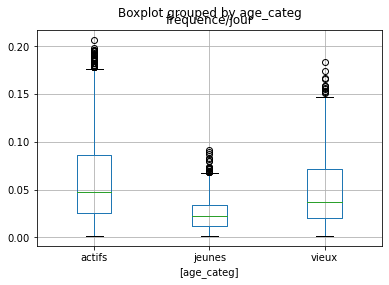

In [61]:
fréquence.boxplot(['fréquence/jour'],['age_categ'])

'p-value = 2.3302123570059496e-54'

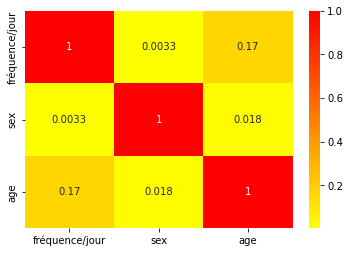

In [62]:
sns.heatmap(fréquence.corr(method='pearson'), annot=True, cmap='autumn_r')
display("p-value = " + str(stats.pearsonr(fréquence['age'], fréquence['fréquence/jour'])[1]))

# Catégorie de livre acheté en fonction de l'âge

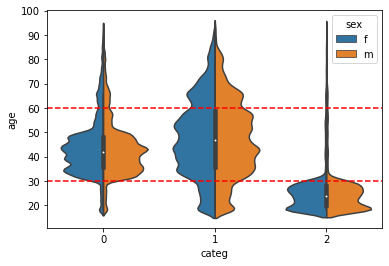

In [63]:
categ = profils.loc[:,['client_id','sex','age','categ']]
categ = categ[-categ['client_id'].isin({'c_3454','c_6714','c_1609','c_4958'})]

sns.violinplot(data=categ, x="categ", y="age", hue='sex', split=True)

plt.axhline(y=30, xmin=0, xmax=1, color='red', linestyle='dashed')
plt.axhline(y=60, xmin=0, xmax=1, color='red', linestyle='dashed')

In [68]:
categ['sex'] = categ['sex'].replace({'f':1})
categ['sex'] = categ['sex'].replace({'m':0})

categ['age_categ'] = categ['age'].apply(lambda x: "jeunes" if x <= 30 
                                                   else "actifs" if x <= 60
                                                   else "vieux")

categ['age_categ'] = categ['age_categ'].replace({'jeunes':1})
categ['age_categ'] = categ['age_categ'].replace({'actifs':2})
categ['age_categ'] = categ['age_categ'].replace({'vieux':3})

categ_contingence = pd.crosstab(categ['age_categ'],categ['categ'])

display(categ_contingence)
display("pvalue = " + str(stats.chi2_contingency(categ_contingence)[1]))
display(stats.kruskal(categ['categ'], categ['age_categ']))

#L'hypothèse null est la suivante: il n'y a pas de corélation.
#La valeur P est de 0 donc l'hypothèse null est rejeté ce qui signifie qu'il y a corrélation entre l'âge et la catégorie de livre.

categ,0,1,2
age_categ,,,
1,16691,28087,29879
2,333978,137642,2186
3,36612,46619,783


'pvalue = 0.0'

KruskalResult(statistic=876189.7671839211, pvalue=0.0)